In [82]:
# work according to the bible

In [83]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
wine_full = pd.read_csv('data/wine_full.csv')

In [85]:
wine_binary = wine_full.copy()

In [86]:
# make target binary 
target_mean = wine_binary.quality.mean()
wine_binary.loc[wine_binary.quality < target_mean, 'quality'] = 0
wine_binary.loc[wine_binary.quality > target_mean, 'quality'] = 1

In [87]:
X = wine_binary.drop('quality', axis=1)
y = wine_binary.quality

In [88]:
# normalise
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [111]:
from sklearn.model_selection import train_test_split
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_norm, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.20, random_state=42, stratify=y_train_full)
print(y_train.shape)

(3403,)


In [90]:
print(X_train.shape)
print(X_val.shape)

(3403, 11)
(851, 11)


In [91]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_val))
print(Counter(y_test_full))

Counter({1: 2132, 0: 1271})
Counter({1: 533, 0: 318})
Counter({1: 666, 0: 398})


In [92]:
# for binary model
# model = keras.models.Sequential([
#     keras.layers.Dense(6, input_shape=(11,), activation='relu'),
#     keras.layers.Dense(12, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
# model.build()

In [93]:
from tensorflow.keras.optimizers import Adam

In [94]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[11]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

In [95]:
keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [96]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [97]:
param_distribs = {
    'n_hidden': [1,2,3,4,5,6],
#     'n_neurons': np.arange(1, 100),
    'n_neurons': (35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102),
    'learning_rate': [0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095, 0.001  , 0.00105, 0.0011 ,
       0.00115, 0.0012 , 0.00125, 0.0013 , 0.00135, 0.0014 , 0.00145,
       0.0015 , 0.00155, 0.0016 , 0.00165, 0.0017 , 0.00175, 0.0018 ,
       0.00185, 0.0019 , 0.00195, 0.002  , 0.00205, 0.0021 , 0.00215,
       0.0022 , 0.00225, 0.0023 , 0.00235, 0.0024 , 0.00245, 0.0025 ,
       0.00255, 0.0026 , 0.00265, 0.0027 , 0.00275, 0.0028 , 0.00285,
       0.0029 , 0.00295, 0.003  , 0.00305, 0.0031 , 0.00315, 0.0032 ,
       0.00325, 0.0033 , 0.00335, 0.0034 , 0.00345, 0.0035 , 0.00355,
       0.0036 , 0.00365, 0.0037 , 0.00375, 0.0038 , 0.00385, 0.0039 ,
       0.00395]
#     'learning_rate': (0.0003, 0.0002, 0.0001, 0.003, 0.002, 0.001)
}

In [98]:
np.arange(0.0001, 0.004, step=0.00005)

array([0.0001 , 0.00015, 0.0002 , 0.00025, 0.0003 , 0.00035, 0.0004 ,
       0.00045, 0.0005 , 0.00055, 0.0006 , 0.00065, 0.0007 , 0.00075,
       0.0008 , 0.00085, 0.0009 , 0.00095, 0.001  , 0.00105, 0.0011 ,
       0.00115, 0.0012 , 0.00125, 0.0013 , 0.00135, 0.0014 , 0.00145,
       0.0015 , 0.00155, 0.0016 , 0.00165, 0.0017 , 0.00175, 0.0018 ,
       0.00185, 0.0019 , 0.00195, 0.002  , 0.00205, 0.0021 , 0.00215,
       0.0022 , 0.00225, 0.0023 , 0.00235, 0.0024 , 0.00245, 0.0025 ,
       0.00255, 0.0026 , 0.00265, 0.0027 , 0.00275, 0.0028 , 0.00285,
       0.0029 , 0.00295, 0.003  , 0.00305, 0.0031 , 0.00315, 0.0032 ,
       0.00325, 0.0033 , 0.00335, 0.0034 , 0.00345, 0.0035 , 0.00355,
       0.0036 , 0.00365, 0.0037 , 0.00375, 0.0038 , 0.00385, 0.0039 ,
       0.00395])

In [99]:
random_search_cv = RandomizedSearchCV(keras_class, param_distribs, n_iter=25, cv=3)
random_search_cv

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000002042497E8C8>,
                   n_iter=25,
                   param_distributions={'learning_rate': [0.0001, 0.00015,
                                                          0.0002, 0.00025,
                                                          0.0003, 0.00035,
                                                          0.0004, 0.00045,
                                                          0.0005, 0.00055,
                                                          0.0006, 0.00065,
                                                          0.0007, 0.00075,
                                                          0.0008, 0.00085,
                                                          0.0009, 0.00095,
                                                          0.001, 0.00105,
                                                          0.0011, 0.00115

In [100]:
# random_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [101]:
# random_search_cv.best_params_

In [102]:
# random_search_cv.best_score_

In [103]:
# model = random_search_cv.best_estimator_.model

In [104]:
# model.summary()

In [105]:
# model.evaluate(X_train, y_train)

In [106]:
# model.evaluate(X_val, y_val)

In [107]:
# model.evaluate(X_test_full, y_test_full)

In [108]:
# y_pred = (model.predict(X_test_full) > 0.5).astype("int32")
from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(y_test_full, y_pred))

In [29]:
# print(confusion_matrix(y_test_full, y_pred))

In [30]:
# NEW SEARCH BASED ON RANDOM SEARCH

In [109]:
param_grid = {
    'n_neurons': np.arange(40, 60, step=2).tolist(),
    'learning_rate': np.arange(0.00250, 0.00350, step=0.0001).tolist()
}

In [33]:
keras_class_grid = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [34]:
grid_search_cv = GridSearchCV(keras_class_grid, param_grid, cv=3)

In [35]:
grid_search_cv.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
71/71 [==============================] - 0s 5ms/step - loss: 0.5546 - accuracy: 0.7213 - val_loss: 0.5169 - val_accuracy: 0.7438
Epoch 2/50
71/71 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7491 - val_loss: 0.5058 - val_accuracy: 0.7462
Epoch 3/50
71/71 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7544 - val_loss: 0.5047 - val_accuracy: 0.7462
Epoch 4/50
71/71 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7615 - val_loss: 0.5050 - val_accuracy: 0.7415
Epoch 5/50
71/71 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7535 - val_loss: 0.5020 - val_accuracy: 0.7403
Epoch 6/50
71/71 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7593 - val_loss: 0.5056 - val_accuracy: 0.7403
Epoch 7/50
71/71 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7698 - val_loss: 0.5036 - val_accuracy: 0.7438
Epoch 8/50
71/71 [==

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000204151BDE48>,
             param_grid={'learning_rate': [0.0025, 0.0026,
                                           0.0026999999999999997,
                                           0.0027999999999999995,
                                           0.0028999999999999994,
                                           0.002999999999999999,
                                           0.003099999999999999,
                                           0.003199999999999999,
                                           0.0032999999999999987,
                                           0.0033999999999999985],
                         'n_neurons': [40, 42, 44, 46, 48, 50, 52, 54, 56, 58]})

In [38]:
grid_search_cv.best_params_

{'learning_rate': 0.0032999999999999987, 'n_neurons': 40}

In [55]:
grid_search_cv.best_score_

0.761678675810496

In [40]:
model_grid = grid_search_cv.best_estimator_.model

In [42]:
model_grid.summary()

Model: "sequential_300"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_600 (Dense)            (None, 40)                480       
_________________________________________________________________
dense_601 (Dense)            (None, 1)                 41        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_grid.evaluate(X_train, y_train)

107/107 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7802


[0.46462830901145935, 0.7801939249038696]

In [57]:
model_grid.evaluate(X_val, y_val)

27/27 [==============================] - 0s 1ms/step - loss: 0.4955 - accuracy: 0.7544


[0.49551600217819214, 0.7544065713882446]

In [58]:
model_grid.evaluate(X_test_full, y_test_full)

34/34 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7519


[0.5117748379707336, 0.7518796920776367]

In [110]:
y_pred = (model_grid.predict(X_test_full) > 0.5).astype("int32")

In [53]:
print(classification_report(y_test_full, y_pred))

In [54]:
print(confusion_matrix(y_test_full, y_pred))

[[229 169]
 [ 95 571]]


In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score, precision_recall_curve
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_full, y_pred))

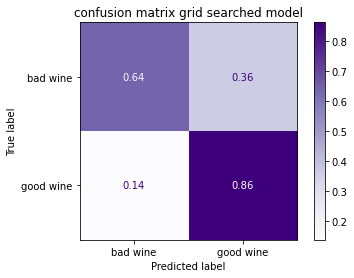

In [112]:
labels = ['bad wine', 'good wine']
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_full, y_pred, normalize='true'), display_labels=labels)
disp.plot(cmap=plt.cm.Purples)
plt.title('confusion matrix grid searched model')
plt.savefig('visuals/grid_confusionmatrix.png')
plt.show()

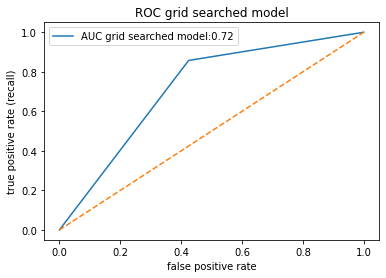

In [70]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test_full, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend()

roc_auc = round(roc_auc_score(y_test_full, y_pred), 2)
label_string = 'AUC grid searched model:' + str(roc_auc)
plot_roc_curve(false_pos_rate, true_pos_rate, label=label_string)
plt.title('ROC grid searched model')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate (recall)')
plt.savefig('visuals/grid_roccurve.png')
plt.show()

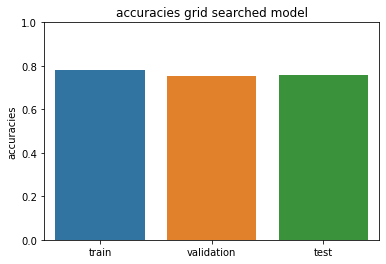

In [69]:
scores = [0.780, 0.754, 0.759 ]
score_labels = ['train', 'validation', 'test']
sns.barplot(x=score_labels, y=scores)
plt.title('accuracies grid searched model')
plt.ylabel('accuracies')
plt.ylim([0,1])
plt.savefig('visuals/grid_accuracies.png')
plt.show()

No handles with labels found to put in legend.


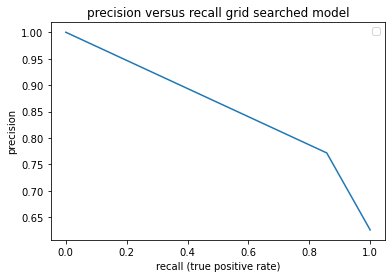

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, plot_roc_curve, roc_curve, roc_auc_score, precision_recall_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
#     plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
#     plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.plot(recalls, precisions)
    plt.legend()


precisions, recalls, thresholds = precision_recall_curve(y_test_full, y_pred)

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title('precision versus recall grid searched model')
plt.xlabel('recall (true positive rate)')
plt.ylabel('precision')
plt.savefig('visuals/grid_precisionrecall.png')
plt.show()

In [ ]:
#### UNDER BEGINS NEW CHAPTER

In [ ]:
# checkpoint_callback = keras.callbacks.ModelCheckpoint('best_only_v3.h5', save_best_only=True, monitor='val_accuracy')

In [ ]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# history = model.fit(x=X_train, y=y_train, epochs=300, batch_size=32, callbacks=[checkpoint_callback, tensorboard_cb], validation_data=(X_val, y_val))

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

In [76]:
# pick best of the above models: 
model = keras.models.load_model('best_only_v3.h5')

In [77]:
# loss = history.history['loss']
# accuracy = history.history['accuracy']
model.save('models/best_only_v3.h5')
# model = keras.models.load_model('path/to/location')

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

In [ ]:
y_pred = (model.predict(X_test_full) > 0.5).astype("int32")
results = model.evaluate(X_test_full, y_test_full, batch_size=32)
print(results)
print(f"Accuracy on test set is {results[1]*100:.2f}%")

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_full, y_pred))

In [ ]:
import tensorflow as tf
print(tf.math.confusion_matrix(y_test_full, y_pred))

In [ ]:
# checkpoint_cb2 = checkpoint_callback = keras.callbacks.ModelCheckpoint('best_only_v3_early_stopping.h5', save_best_only=True, monitor='val_accuracy')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# history2 = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_cb2, early_stopping_cb])

In [ ]:
# model = keras.models.load_model('best_only_v3_early_stopping.h5')

In [ ]:
# loss = history2.history['loss']
# accuracy = history2.history['accuracy']

In [ ]:
# y_pred = (model.predict(X_test) > 0.5).astype("int32")
# results = model.evaluate(X_test, y_test, batch_size=32)
# print(results)
# print(f"Accuracy on test set is {results[1]*100:.2f}%")

In [ ]:
# model.evaluate(X_train, y_train)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

In [ ]:
# import tensorflow as tf
# print(tf.math.confusion_matrix(y_test, y_pred))